In [84]:
import pandas as pd

In [85]:
order_reviews_path = '/Users/sviat/Downloads/OneDrive_1_30-04-2024/S_Data/order_reviews.csv'
order_items_path = '/Users/sviat/Downloads/OneDrive_1_30-04-2024/S_Data/order_items.csv'

In [86]:
order_reviews = pd.read_csv(order_reviews_path)
order_items = pd.read_csv(order_items_path)

In [87]:
order_items_reviews = order_items.join(order_reviews.set_index('order_id'),on='order_id')
order_items_reviews

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,97ca439bc427b48bc1cd7177abe71365,5,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,7b07bacd811c4117b742569b04ce3580,4,NaN,NaN,2017-05-13 00:00:00,2017-05-15 11:34:13
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,0c5b33dea94867d1ac402749e5438e8b,5,NaN,Chegou antes do prazo previsto e o produto sur...,2018-01-23 00:00:00,2018-01-23 16:06:31
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,f4028d019cb58564807486a6aaf33817,4,NaN,NaN,2018-08-15 00:00:00,2018-08-15 16:39:01
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,940144190dcba6351888cafa43f3a3a5,5,NaN,Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59
...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,9185f849f32d82e216a4e025e0c50f5c,5,NaN,NaN,2018-05-11 00:00:00,2018-05-14 12:53:47
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,be803f6a93d64719fd685c1cc610918a,5,NaN,NaN,2018-07-24 00:00:00,2018-07-25 09:25:29
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,dbdd81cd59a1a9f94a10a990b4d48dce,5,NaN,NaN,2017-10-29 00:00:00,2017-10-29 21:33:52
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,fba117c9ac40d41ca7be54741f471303,5,NaN,Recebi o produto antes do prazo e corretamente.,2017-08-17 00:00:00,2017-08-18 12:24:05


## Scoring distribution

<Axes: xlabel='review_score'>

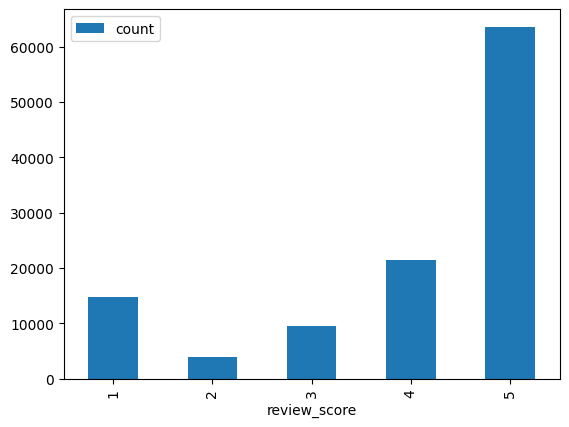

In [88]:
    score_cor = order_items_reviews.groupby(['review_score']).review_score.count().reset_index(name='count')
    score_cor.index = score_cor['review_score']
    score_cor = score_cor.drop(columns=['review_score'])
    score_cor.plot.bar()

## Items review analysis

calculating the average score for each seller

In [89]:
items_reviews = order_items_reviews.groupby(['product_id']).review_score.mean().reset_index(name='mean_score')
items_reviews = items_reviews.sort_values(by='mean_score')
items_reviews

,product_id,mean_score
11572,592cc6634d2c783d297effc0b828bc37,1.0
5376,28c95d7653177449fd4b6fc7adb63ce9,1.0
5378,28d6d6a10ceb0636ae572e7efafef612,1.0
5379,28d7da9ebe96bfda54aed060b68b23a1,1.0
18040,8c4e5e50a08a443b7fbad34ad7587625,1.0
...,...,...
15299,75fc57fb06b1d35ea433e16ecbf5a6bb,5.0
15298,75f95431890ea981914bdb4772341221,5.0
15296,75f54c6aa3a4ccb9ab44fae693c21418,5.0
15305,76061aaf8a1e4e93cdd26f7bef9ce247,5.0


### 10 products with the best ratings

In [90]:
best_products = items_reviews[-10:]
best_products

,product_id,mean_score
15307,760be8243b7e45dab18ef46ace561ff9,5.0
15303,76052d3aafb407055d02120f56cc8a26,5.0
15302,76047a9f85e0601a31579a9a9e88a0e8,5.0
15301,7600ad0c8b6aec897862eb7944ae0856,5.0
15300,75fd4b482095ed05dd23030260e65300,5.0
15299,75fc57fb06b1d35ea433e16ecbf5a6bb,5.0
15298,75f95431890ea981914bdb4772341221,5.0
15296,75f54c6aa3a4ccb9ab44fae693c21418,5.0
15305,76061aaf8a1e4e93cdd26f7bef9ce247,5.0
16475,7f6f8bdeee8ab42b5b4873b754f22a15,5.0


### 10 products with the worst ratings

In [91]:
worst_products = items_reviews[:10]
worst_products

,product_id,mean_score
11572,592cc6634d2c783d297effc0b828bc37,1.0
5376,28c95d7653177449fd4b6fc7adb63ce9,1.0
5378,28d6d6a10ceb0636ae572e7efafef612,1.0
5379,28d7da9ebe96bfda54aed060b68b23a1,1.0
18040,8c4e5e50a08a443b7fbad34ad7587625,1.0
18039,8c4dc358af6e14174f2114be62c18f37,1.0
18034,8c4456c061013adccb1ba4cbce2d0365,1.0
18030,8c35dc99b37ba51780800ba049ed3616,1.0
5409,28fe66c8a81afe9be7829f40a5fae9ee,1.0
30663,ee37349d258101b9d573a256d1401ff7,1.0


## Items review analysis

calculating the average score for each seller

In [92]:
seller_reviews = order_items_reviews.groupby(['seller_id']).review_score.mean().reset_index(name='mean_score')
seller_reviews = seller_reviews.sort_values(by='mean_score')
seller_reviews

,seller_id,mean_score
1665,87f3e35268860433e13d577825aada95,1.0
128,0aa124728afc1131dff5655f4c6f487b,1.0
1827,9599519be538b98748162a2b48248960,1.0
1845,96f7c797de9ca20efbe14545bed63eec,1.0
1858,984c273121e743dd14767befe6cb17f5,1.0
...,...,...
1529,7c4402417d51474d4d0cda9557340e40,5.0
1290,6a3139c7bf09ece22a4713d956acbe5e,5.0
863,48efc9d94a9834137efd9ea76b065a38,5.0
1173,5f5a58930c3c35f3b5af264f34fb8c85,5.0


### 10 sellers with the best ratings

In [93]:
seller_reviews[-10:]

,seller_id,mean_score
1172,5f57db27027655e6c6a391601daa0258,5.0
2384,c52c644cc0dc85121207a27013efc6af,5.0
1061,570d4583587a5fe2d47c7be89b91ad27,5.0
519,2c00c85d30361cd2ced2969cffbbffa3,5.0
1022,53b0300ca793f9834cd69c0678d35ee8,5.0
1529,7c4402417d51474d4d0cda9557340e40,5.0
1290,6a3139c7bf09ece22a4713d956acbe5e,5.0
863,48efc9d94a9834137efd9ea76b065a38,5.0
1173,5f5a58930c3c35f3b5af264f34fb8c85,5.0
1319,6c17baf138731a4aaacc3210adf2037b,5.0


### 10 sellers with the worst ratings

In [94]:
seller_reviews[:10]

,seller_id,mean_score
1665,87f3e35268860433e13d577825aada95,1.0
128,0aa124728afc1131dff5655f4c6f487b,1.0
1827,9599519be538b98748162a2b48248960,1.0
1845,96f7c797de9ca20efbe14545bed63eec,1.0
1858,984c273121e743dd14767befe6cb17f5,1.0
1877,9a208dee8f95cfdf00760c4d627828ec,1.0
395,20fd2d2080ed85fa67fad3fcbb2c1813,1.0
394,20f0aeea30bc3b8c4420be8ced4226c0,1.0
2719,e1a210d482714ce337763a19aef94ba4,1.0
1825,9591fc341b1bfb7ef561e2968ec6e011,1.0


### Sellers with only negative ratings

In [95]:
only_negative_sellers = order_items_reviews
only_negative_sellers.index = only_negative_sellers['seller_id']
only_negative_sellers = only_negative_sellers.drop(columns = ['seller_id'])
only_negative_sellers = only_negative_sellers.groupby('seller_id').review_score.transform(lambda x:x.max()<3).reset_index(name = "only_negative")
only_negative_sellers = only_negative_sellers[only_negative_sellers.only_negative ==True]
only_negative_sellers

,seller_id,only_negative
271,bf0d50a6410d487dc97d2baac0a8c0be,True
2096,ec2e006556300a79a5a91e4876ab3a56,True
2342,2ec6e37d992a95eaddb3369dcbcc76d9,True
2395,5ca5d579b5857ee8709479b1047cecc3,True
2468,ec2e006556300a79a5a91e4876ab3a56,True
...,...,...
112812,4e2627090e6e5b9fabba883a37897683,True
112813,4e2627090e6e5b9fabba883a37897683,True
112814,4e2627090e6e5b9fabba883a37897683,True
112815,4e2627090e6e5b9fabba883a37897683,True


## Comment that contain price

In [96]:
key_word = 'preço'
dfc = order_reviews.copy()
dfc = dfc.dropna(subset = ['review_comment_message'])
for i in range(len(order_reviews)):
    if i in dfc.index:
        if key_word in order_reviews.review_comment_message.iloc[i]:
            order_reviews.loc[i,'price_in_comment']=1
        else: 
            order_reviews.loc[i,'price_in_comment']=0
    else:
        order_reviews.loc[i,'price_in_comment']=0

In [97]:
reviews_with_price = order_reviews[order_reviews['price_in_comment']==1]

In [98]:
reviews_with_price

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,price_in_comment
515,9d14b1424ca737608bc50f9d3c1a78bb,04ad8c8d81d4c6b6936947bfe41c20fd,3,NaN,"Produto de boa qualidade, exatamente conforme ...",2018-03-20 00:00:00,2018-03-21 03:11:29,1.0
569,b0ac2d014efe743e181a5e8dc9cfb8ad,483ad8e78dc16136316aded1f0602031,3,NaN,"O preço foi ótimo, o prazo de entrega que é lo...",2018-02-22 00:00:00,2018-02-27 11:29:18,1.0
578,c374da82d5c67281544168e3cfb22be3,73bf036e9d518e060d6f766d816483cb,5,NaN,"Otimo, preço, entregou antes do prazo e produt...",2018-03-22 00:00:00,2018-03-22 21:32:12,1.0
674,7b66de927426b71a817aa36df5e8a0b3,634e8f4c0f6744a626f77f39770ac6aa,1,NaN,Muito bom o produto e preço cobrado!,2017-08-17 00:00:00,2017-08-17 23:36:23,1.0
778,e93caf1e1d6e84cc001518f2d191eb5b,4212c4acae39b267aabc4696d873cbcf,5,NaN,Boa qualidade e preço.,2017-03-04 00:00:00,2017-03-08 01:15:08,1.0
...,...,...,...,...,...,...,...,...
99465,93d8779f2838b365db5e3c4ebb95ca6b,b9edb51e964553c82dd1cb214873cc32,5,NaN,Ótima loja com produtos de qualidade a preços ...,2018-01-25 00:00:00,2018-02-03 21:47:25,1.0
99661,5af783f2de48f0ba9b286b655b7e4661,9fe26c640da2c51c4f699a364a195ccd,5,Rapidez e qualidade,"Desde o preço, toda a transação ocorreu de mod...",2018-08-04 00:00:00,2018-08-05 00:44:39,1.0
99721,c95f2dcf04d2f94db0a3f6ed3843ee9a,91b6cbbbf1622738a27f04f25306a6d6,5,NaN,"Entrega antes do prazo, produto com preço bom ...",2018-02-04 00:00:00,2018-02-05 10:29:16,1.0
99820,77ab7b9e9da3faedba4592a68872428a,93c876d3232e6a2353011f181e7f3c40,4,NaN,"Boa qualidade da mercadoria, pontualidade e pr...",2018-04-11 00:00:00,2018-04-11 22:01:50,1.0
